# TensorFlow/Keras Model

In [1]:
import h5py
import numpy as np

# Load the photons dataset
with h5py.File('./Common_task1/photons.hdf5', 'r') as f:
    photons_data = np.array(f['X'][:])
    photons_labels = np.array(f['y'][:])

# Load the electrons dataset
with h5py.File('./Common_task1/electrons.hdf5', 'r') as f:
    electrons_data = np.array(f['X'][:])
    electrons_labels = np.array(f['y'][:])

# Print the shape of the arrays
print("Photons data shape:", photons_data.shape)
print("Photons labels shape:", photons_labels.shape)
print("Electrons data shape:", electrons_data.shape)
print("Electrons labels shape:", electrons_labels.shape)


Photons data shape: (249000, 32, 32, 2)
Photons labels shape: (249000,)
Electrons data shape: (249000, 32, 32, 2)
Electrons labels shape: (249000,)


In [2]:
from sklearn.model_selection import train_test_split

# Combine the data and labels
data = np.concatenate((photons_data, electrons_data), axis=0)
labels = np.concatenate((photons_labels, electrons_labels), axis=0)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print the shape of the sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (398400, 32, 32, 2)
y_train shape: (398400,)
X_test shape: (99600, 32, 32, 2)
y_test shape: (99600,)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

# Define the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,2)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=[AUC()])

# Train the model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=32)


Epoch 1/30
9960/9960 [==============================] - 758s 76ms/step - loss: 0.6580 - auc_1: 0.6447 - val_loss: 0.6451 - val_auc_1: 0.6704
Epoch 2/30
9960/9960 [==============================] - 624s 63ms/step - loss: 0.6378 - auc_1: 0.6835 - val_loss: 0.6222 - val_auc_1: 0.7094
Epoch 3/30
9960/9960 [==============================] - 735s 74ms/step - loss: 0.6149 - auc_1: 0.7205 - val_loss: 0.6044 - val_auc_1: 0.7386
Epoch 4/30
9960/9960 [==============================] - 747s 75ms/step - loss: 0.6003 - auc_1: 0.7396 - val_loss: 0.5929 - val_auc_1: 0.7492
Epoch 5/30
9960/9960 [==============================] - 798s 80ms/step - loss: 0.5923 - auc_1: 0.7494 - val_loss: 0.5861 - val_auc_1: 0.7578
Epoch 6/30
9960/9960 [==============================] - 959s 96ms/step - loss: 0.5871 - auc_1: 0.7558 - val_loss: 0.5820 - val_auc_1: 0.7618
Epoch 7/30
9960/9960 [==============================] - 933s 94ms/step - loss: 0.5831 - auc_1: 0.7606 - val_loss: 0.5776 - val_auc_1: 0.7658
Epoch 8/30
99

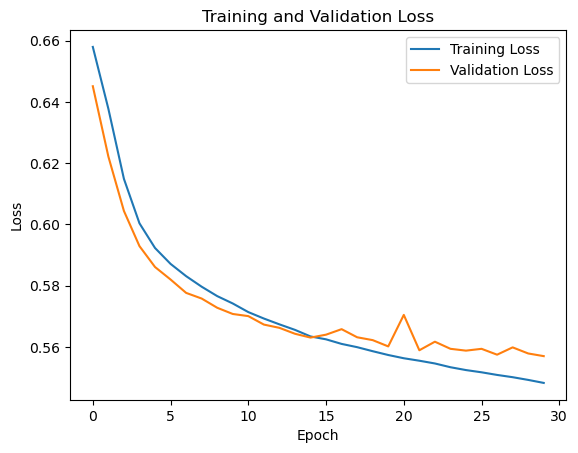

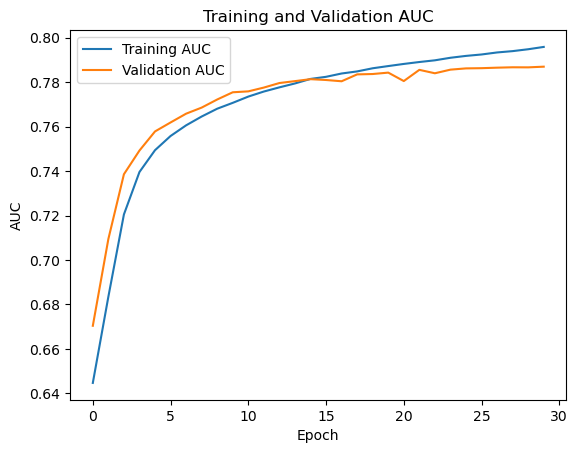

In [7]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation AUC
plt.plot(history.history['auc_1'], label='Training AUC')
plt.plot(history.history['val_auc_1'], label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()


In [8]:
from sklearn.metrics import roc_auc_score

# Evaluate the model on the test set
y_pred = model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)

# Print the ROC AUC score
print("ROC AUC score:", auc)


3113/3113 [==============================] - 29s 9ms/step
ROC AUC score: 0.7841930150510026
